In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import umap

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
customer_df = pd.read_csv('/Users/amandashaffner/Desktop/marketing_campaign.csv', sep= '\t')

In [3]:
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
customer_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
customer_df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
#Droping missing values. 

customer_df = customer_df.dropna()

customer_df.shape

(2216, 29)

In [8]:
#Exploration of categorical features

print('Unique Values for Education: \n', customer_df['Education'].value_counts(), "\n")

print('Unique Values for Marital_Status: \n', customer_df['Marital_Status'].value_counts())


Unique Values for Education: 
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Unique Values for Marital_Status: 
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [9]:
#Converting the date a customer was entered into the data frame from object to DateTime.

customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'])

print(customer_df['Dt_Customer'].min(), customer_df['Dt_Customer'].max())

2012-01-08 00:00:00 2014-12-06 00:00:00


In [10]:
#Calculating the number of days person was customer based on the newest customer date. 
customer_df['Days_customer'] = (customer_df['Dt_Customer'].max() - customer_df['Dt_Customer']).dt.days

#Calulating total spending. 
customer_df['total_spending'] = customer_df['MntWines'] + customer_df['MntMeatProducts'] + customer_df['MntFishProducts'] + customer_df['MntSweetProducts'] + customer_df['MntGoldProds']

#Calculating total amount of children. 
customer_df['children'] = customer_df['Kidhome'] + customer_df['Teenhome']

#Cleaning and simplifying marital response data. 
customer_df['Relationship_Status'] = customer_df['Marital_Status'].replace({"Married": "Married/Partner", "Together": "Married/Partner", "Divorced": "Single", "Widow": "Single", "Alone": "Single", "Absurd": "Single", "YOLO": "Single"})

#Cleaning and simplifying education response data. 
customer_df['Education']= customer_df['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Droping un-needed/duplicate columns.
to_drop = ["Marital_Status", "Kidhome", "Teenhome", "Z_CostContact", "Z_Revenue", "Dt_Customer" ]

customer_df = customer_df.drop(to_drop, axis = 1)

In [11]:
customer_df.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_customer,total_spending,children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,512.006318,580.719314,0.947202
std,3249.376275,11.985554,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,232.469034,579.350233,0.749062
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,340.000000,65.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,513.000000,375.500000,1.000000
75%,8421.750000,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,686.000000,983.500000,1.000000
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1063.000000,2464.000000,3.000000


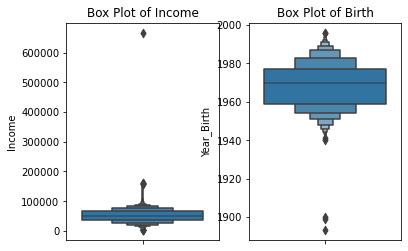

In [12]:
plt.subplot(1,2,1)
pl=sns.boxenplot(y=customer_df["Income"])
pl.set_title("Box Plot of Income")


plt.subplot(1,2,2)
pl=sns.boxenplot(y=customer_df["Year_Birth"])
pl.set_title("Box Plot of Birth")
plt.show()

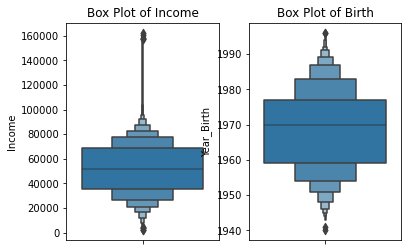

In [13]:
#Removing Outliers. 

customer_df = customer_df[(customer_df["Year_Birth"] > 1920)]
customer_df = customer_df[(customer_df["Income"] < 500000)]

plt.subplot(1,2,1)
pl=sns.boxenplot(y=customer_df["Income"])
pl.set_title("Box Plot of Income")


plt.subplot(1,2,2)
pl=sns.boxenplot(y=customer_df["Year_Birth"])
pl.set_title("Box Plot of Birth")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns you want to encode
columns_to_encode = ['Relationship_Status', 'Education']

# Apply label encoding to selected columns
for col in columns_to_encode:
    customer_df[col] = customer_df[[col]].apply(label_encoder.fit_transform)

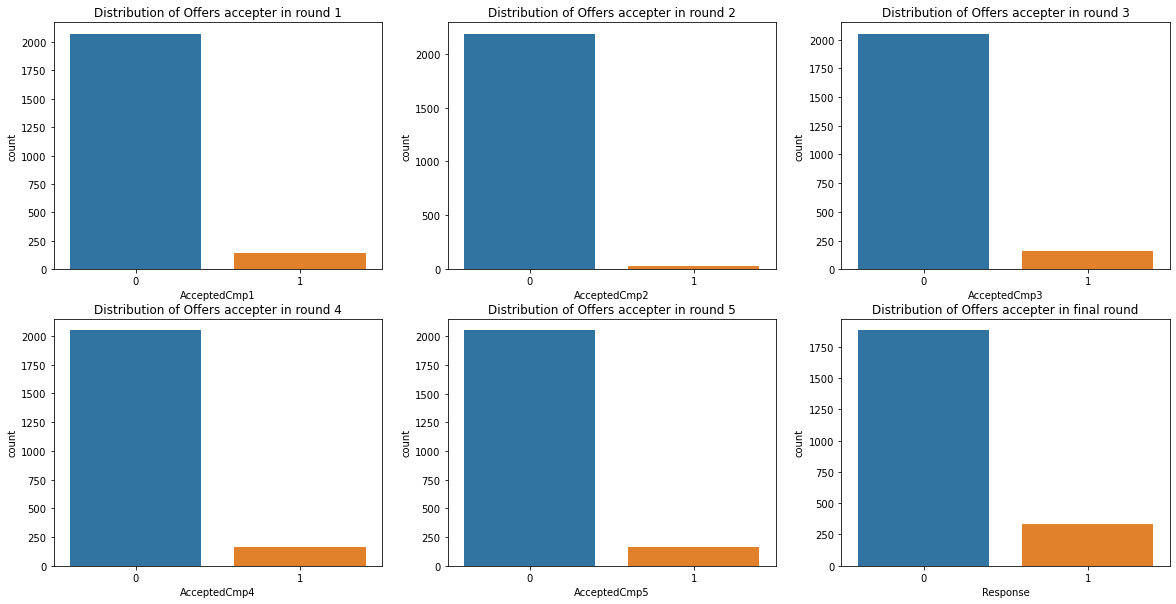

In [15]:
plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
sns.countplot(customer_df["AcceptedCmp1"])
plt.title("Distribution of Offers accepter in round 1")

plt.subplot(2,3,2)
sns.countplot(customer_df["AcceptedCmp2"])
plt.title("Distribution of Offers accepter in round 2")

plt.subplot(2,3,3)
sns.countplot(customer_df["AcceptedCmp3"])
plt.title("Distribution of Offers accepter in round 3")

plt.subplot(2,3,4)
sns.countplot(customer_df["AcceptedCmp4"])
plt.title("Distribution of Offers accepter in round 4")

plt.subplot(2,3,5)
sns.countplot(customer_df["AcceptedCmp5"])
plt.title("Distribution of Offers accepter in round 5")

plt.subplot(2,3,6)
sns.countplot(customer_df["Response"])
plt.title("Distribution of Offers accepter in final round")

plt.show()

In [16]:
#Due to low number of accepted offers, creating coping of data without above columns. 
to_drop = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", ]

cust_df2 = customer_df.drop(to_drop, axis = 1)


# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(cust_df2)

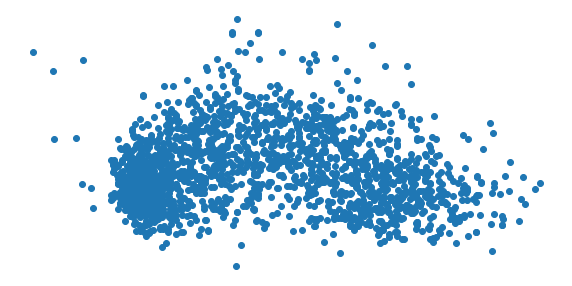

In [17]:
X_pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

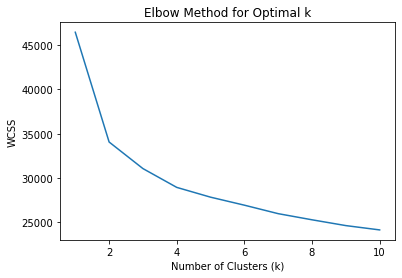

In [18]:
# Initialize a list to store WCSS values.
wcss = []

# Try k values from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)  # Inertia is another name for WCSS

# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Splitting the data into four equally sized samples. First, break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [20]:
# DataFrame to store features and predicted cluster memberships
ypred = pd.DataFrame()

for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into `ypred`
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 3-5.
    for nclust in range(3, 6):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

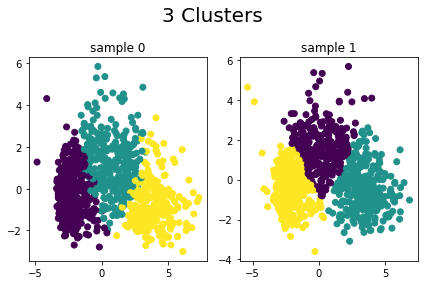

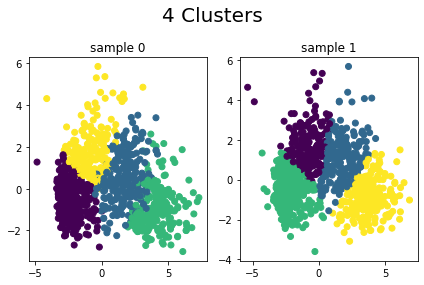

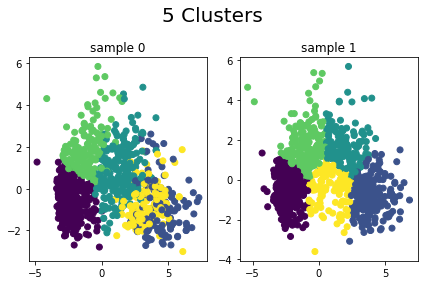

In [21]:
# For each  number of clusters, plot the clusters using the
# PCA features for each sample
for cluster in range(3, 6):
    
    # Make a grid of subplots
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample
    for i in range(2):
        
        # PCA-created features
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [22]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
kmeans_cluster.fit(X_pca)
clusters = kmeans_cluster.predict(X_pca)

In [23]:
labels = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.18207405675240157


Based on both the elbow method and predicted clusters for samples, 4 clusters performs slightly better than the 3 clusters. However, the silhouette score is low and thus I will see if another clustering method works better. 

The silhouette score of the Agglomerative Clustering solution: 0.17064689163823538


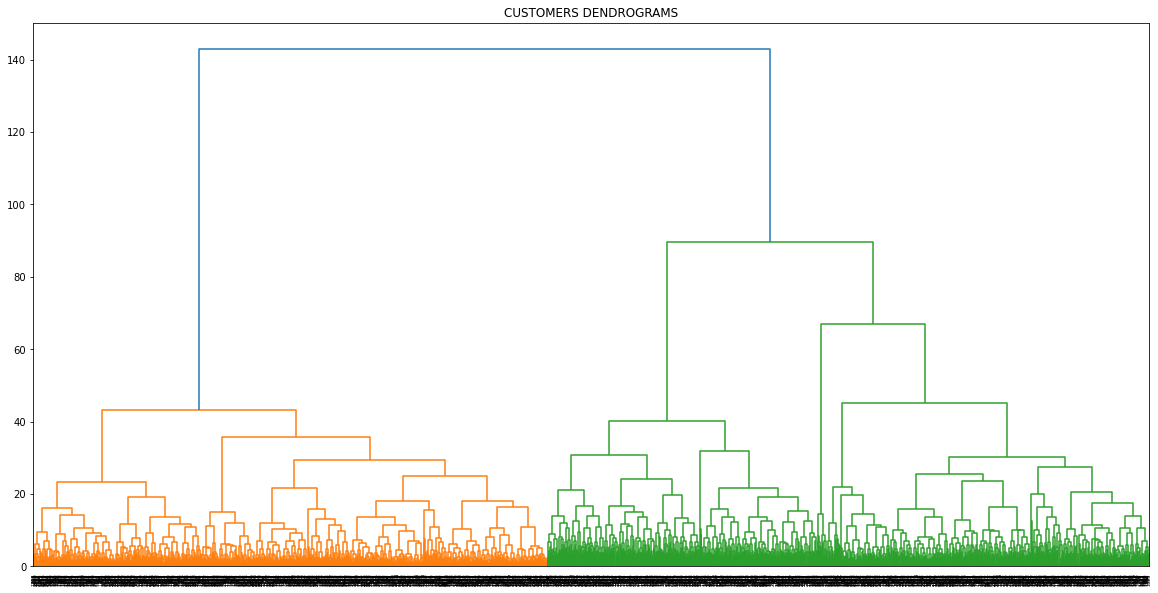

In [24]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=4)

# Fit model
clusters = agg_cluster.fit_predict(X_std)


print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

plt.figure(figsize=(20,10))
plt.title("CUSTOMERS DENDROGRAMS")
dendrogram(linkage(X_std, method='ward'))
plt.show()

In [25]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("The silhouette score of the GMM (n_components = 3) solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("The silhouette score of the GMM (n_components = 4) solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the GMM (n_components = 3) solution: 0.20667405616469037
The silhouette score of the GMM (n_components = 4) solution: 0.10305294041012396


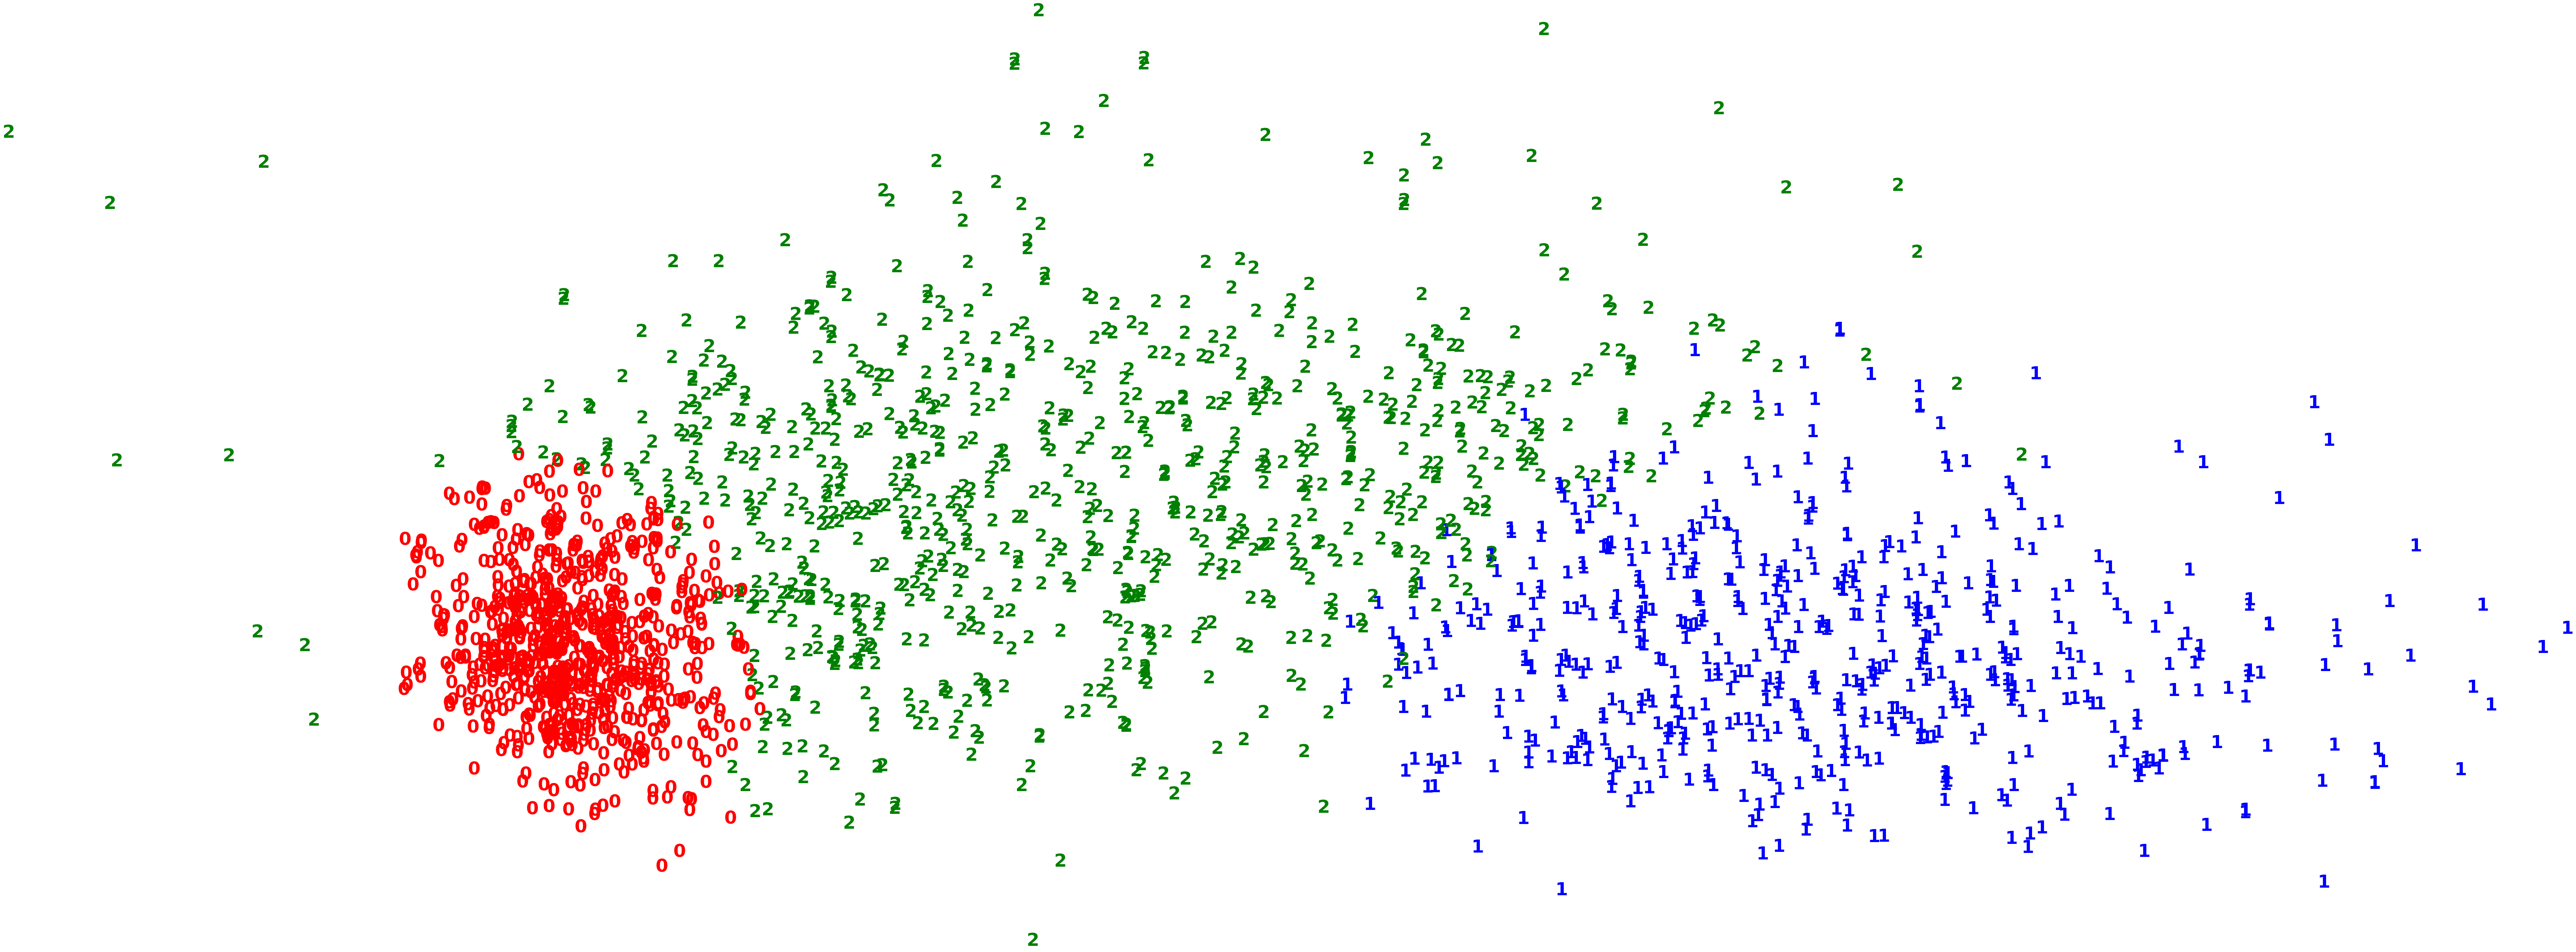

In [32]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[int(clusters[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

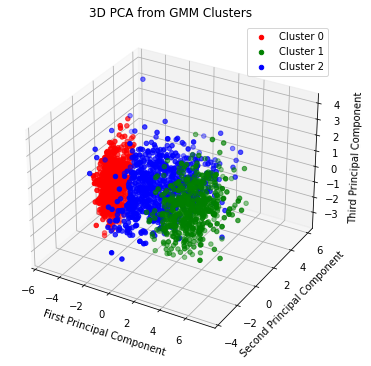

In [27]:
#3D representation to see if clusters are clearer. 

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)


gmm_cluster = GaussianMixture(n_components=3, random_state=123)
clusters = gmm_cluster.fit_predict(X_pca)



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for cluster_label, color in zip(range(4), colors):
    cluster_points = X_pca[clusters == cluster_label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {cluster_label}')

ax.set_title('3D PCA from GMM Clusters')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.legend()

plt.show()



For the purpose of further analysis, I have chosen to go with 3 cluster Guassain, due to its higher silhouette score and good vizualizations. 

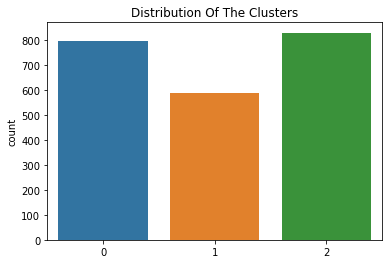

In [28]:
pl = sns.countplot(x=clusters)
pl.set_title("Distribution Of The Clusters")
plt.show()

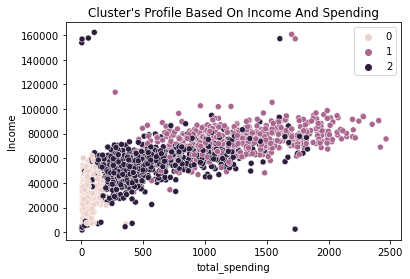

In [30]:
pl = sns.scatterplot(data = customer_df ,x = customer_df['total_spending'], y = (customer_df['Income']), hue=clusters)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


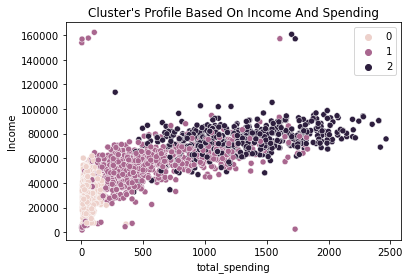

In [36]:
#Relabeling for clarity, 

clusters = np.array([1 if x == 2 else 2 if x==1 else 0 for x in clusters])

pl = sns.scatterplot(data = customer_df ,x = customer_df['total_spending'], y = (customer_df['Income']), hue=clusters)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

0 - Low income, Low spender
1 - middle income, moderate spender 
2 - High income, high spender

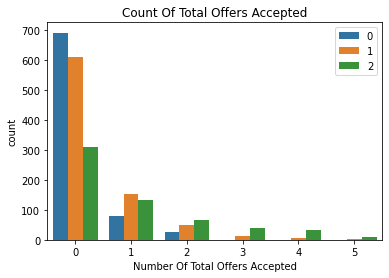

In [38]:
#Plotting count of total offers accepted.

customer_df["offers_accepted"] = customer_df["AcceptedCmp1"] + customer_df["AcceptedCmp2"] + customer_df["AcceptedCmp3"] + customer_df["AcceptedCmp4"]+ customer_df["AcceptedCmp5"] + customer_df["Response"]


plt.figure()
pl = sns.countplot(x=customer_df["offers_accepted"], hue=clusters)
pl.set_title("Count Of Total Offers Accepted")
pl.set_xlabel("Number Of Total Offers Accepted")
plt.show()

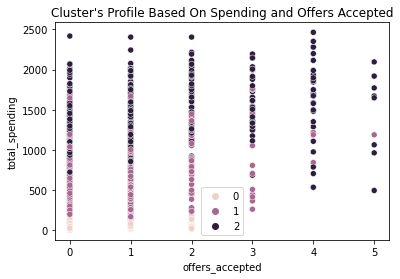

In [39]:
#looking at spending vs. number of offers accepted. 

pl = sns.scatterplot(data = customer_df ,x = customer_df["offers_accepted"], y=customer_df["total_spending"],hue=clusters)
pl.set_title("Cluster's Profile Based On Spending and Offers Accepted")
plt.legend()
plt.show()

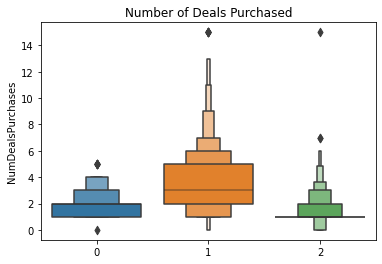

In [40]:
plt.figure()
pl=sns.boxenplot(y=customer_df["NumDealsPurchases"],x=clusters)
pl.set_title("Number of Deals Purchased")
plt.show()

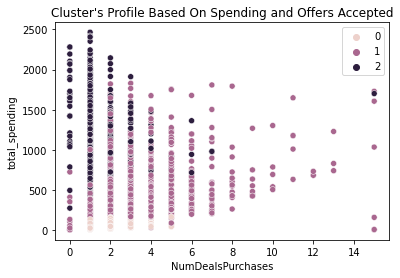

In [41]:
#looking at spending vs. number of purchases with offers. 

pl = sns.scatterplot(data = customer_df ,x = customer_df["NumDealsPurchases"], y=customer_df["total_spending"],hue=clusters)
pl.set_title("Cluster's Profile Based On Spending and Offers Accepted")
plt.legend()
plt.show()

Observations from the visualizations: 
1. The more people make, the more they spend. 
2. The people how spent more where more likely to accept an offer. 
3. The moderate spending where more likely to purchase a deal. 


